In [1]:
import math

from scipy.fftpack import fft2, ifft2, fftshift, ifftshift
import numpy as np
#from numpy.fft import fft2, ifft2, fftshift, ifftshift
import cv2
import matplotlib.pyplot as plt

In [2]:
def load_image(filename):
    src = cv2.imread(filename, cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    return gray

def image_fft(img):
    temp_array = np.array(img)
    return fftshift(fft2(temp_array))

def image_ifft(frequency_matrix):
    return ifft2(fftshift(frequency_matrix))

[[[156 156 156 156 156 156 155 153 151 151 152 152 152 152 151 150 150
   150 151 151 151 151 151 151 152 152 155 154 153 153 154 154 156 159
   159 159 160 161 161 163 165 167 166 165 166 166 164 163 162 163 164
   164 164 164 164 165 167 166 164 164 163 161 161 162 164 164 164 166
   167 166 165 167 172 174 175 175 176 179 192 204 207 207 208 209 209
   210 210 210 210 210 209 205 202 199 199 198 195 192 188 184 183 183
   183 181 179 177 175 173 173 173 173 171 169 166 167 168 168 165 163
   162 162 162 161 159 157 157 156 155 154 154 152 150 151 152 152 152
   151 151 150 148 148 148 148 149 150 153 156 155 153 152 152 153 154
   155 154 153 153 151 152 152 152 150 151 153 152 150 149 151 152 153
   154 154 154 154 155 154 153 153 154 154 155 154 151 150 151 151 153
   153 154 154 155 155 154 155 156 155 155 154 153 153 153 153 154 153
   152 154 156 156 156 156 157 158 156 155 155 152 145 135 113  91  72
    53  42  35  30  28  27  26  27  29  30  30  30  30  30  31  32  32
    34

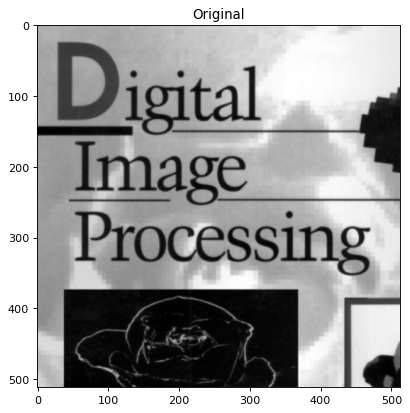

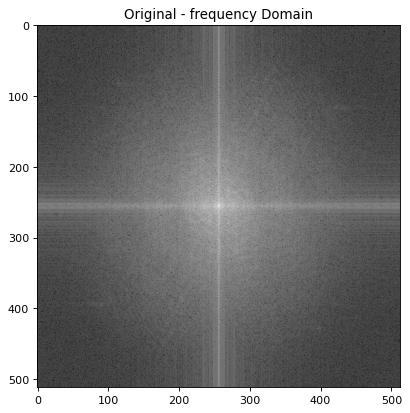

In [3]:
img_size = (512, 512)
img1 = load_image('DIPcover_pt2.bmp')
img1 = cv2.resize(img1, img_size, interpolation = cv2.INTER_AREA)
print(img1[np.max(img1,keepdims=True)])
print(img1[np.min(img1,keepdims=True)])

plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.title("Original")
plt.imshow(img1, cmap='gray');


FFT1 = image_fft(img1)
display_fft = np.log(1 + abs(FFT1))
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.title("Original - frequency Domain")
plt.imshow(display_fft, cmap='gray');

In [4]:
def get_mag_and_phase(matrix, imaginary=False):
    output_magnitude = np.zeros(matrix.shape)
    output_phase_angle = np.zeros(matrix.shape, dtype=complex)
    for y in range(matrix.shape[1]):
        for x in range(matrix.shape[0]):
            real = matrix[x][y].real
            imag = matrix[x][y].imag
            output_magnitude[x][y] = math.sqrt(real ** 2 + imag ** 2)
            tmp_atan = math.atan2(imag, real) * (180 / math.pi)
            if imaginary:
                output_phase_angle[x][y] = complex(1, tmp_atan)
            else:
                output_phase_angle[x][y] = tmp_atan
    return output_magnitude, output_phase_angle

In [5]:
magnitude, imag_phase_angle = get_mag_and_phase(FFT1, imaginary=True)

5790
-26


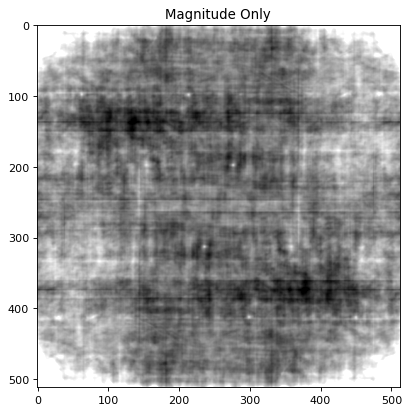

In [6]:
#display_mag = abs(image_ifft(magnitude))#.real.astype(int)
display_mag = image_ifft(magnitude).real.astype(int)
#display_mag = magnitude
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.title("Magnitude Only")
plt.imshow(display_mag, cmap='gray', vmin=0, vmax=250);
print(np.max(display_mag))
print(np.min(display_mag))

10.093258151001823
0.0006866455078125


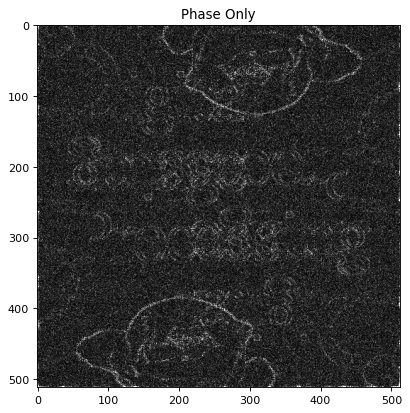

In [12]:
display_phase = abs(image_ifft(imag_phase_angle))
# display_phase = image_ifft(imag_phase_angle).real.astype(int)
# display_phase = display_phase * 255
# ifft_phase = image_ifft(imag_phase_angle)

plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.title("Phase Only")
plt.imshow(display_phase, cmap='gray', vmin=0, vmax=1);

print(np.max(display_phase))
print(np.min(display_phase))

In [8]:
print(display_phase)

[[ 1.00000024  7.49247549  1.28592348 ...  1.63932802  1.28592348
   7.49247549]
 [ 7.60063683 10.09325815  0.05796833 ...  0.51675832  2.60651566
   0.10355287]
 [ 2.44444423  0.48091303  1.83321396 ...  0.13648557  0.03027125
   2.91508806]
 ...
 [ 2.25005847  0.53097174  0.51179512 ...  0.20589051  0.15688772
   2.47023237]
 [ 2.44444423  2.91508806  0.03027125 ...  0.11334773  1.83321396
   0.48091303]
 [ 7.60063683  0.10355287  2.60651566 ...  1.5767947   0.05796833
  10.09325815]]
